In [1]:
import pandas as pd
import xarray as xr
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import matplotlib as mpl
import matplotlib.pyplot as plt
%run /mnt/d/work/sunhh/script/function/lambert_ticks

In [2]:
def YMD_todatetime(ds):
  # 读取年月日数据，转换为Timestape，由于本质上还是遍历所有行，因此这个步骤最费时间
    import pandas as pd
    from datetime import datetime
    time = datetime(  # datetime 只接收整形参数，返回一个datetime类型的日期
        ds['Year'].astype(int), ds['Mon'].astype(int), ds['Day'].astype(int), ds['Hour'].astype(int)
    )
    return pd.to_datetime(time)

In [3]:
def PreProcess(df_t):
    df_t.insert( # 插入日期列，此时并不以此为索引
        1, 'time',df_t.iloc[:, 1:5].apply(YMD_todatetime, axis=1)
    ) 
    df_t.drop(columns=['Year', 'Mon', 'Day', 'Hour'], inplace=True, errors='raise')
    return df_t

In [4]:
StaDir = '/mnt/d/work/sunhh/data/station/' # 文件路径，自定义
usecols = ['Station_Id_C', 'Year', 'Mon', 'Day', 'Hour', 'TEM', 'PRE_1h'] # 需要的变量
# na_values = [32700, 32744, 32766]  # 分别代表 微量、空白、缺测，读取时替换为Nan
df = pd.DataFrame() 
df_t = pd.read_csv(
    StaDir+'SURF_CHN_MUL_HOR_20220707-20220810.txt',
    # sep='\s+',  parse_dates=False, na_values=na_values,
    sep='\s+',  parse_dates=False,
    engine='python', usecols=usecols, encoding='utf-8')
df_t = PreProcess(df_t)  # 中间处理
df = df_t
# df = df.append(df_t, ignore_index=True,
               # verify_integrity=False, sort=None)
# df['Station_Id_C'] = df['Station_Id_C'].astype(int) 
# df.columns = ['StaNum', 'time', 'prec', 'pres',
              # 'wind', 'temp', 'vpres', 'rh', 'sunhr']  # 更改变量名
# df.to_hdf('Station_test.hdf', key='df', mode='w') # 保存变量

In [5]:
df

,Station_Id_C,time,TEM,PRE_1h
0,50136,2022-07-07 00:00:00,19.3,0.0
1,50136,2022-07-07 01:00:00,20.5,0.0
2,50136,2022-07-07 02:00:00,21.0,0.0
3,50136,2022-07-07 03:00:00,21.2,0.0
4,50136,2022-07-07 04:00:00,22.7,0.0
...,...,...,...,...
2105222,59951,2022-08-10 19:00:00,25.6,1.1
2105223,59951,2022-08-10 20:00:00,25.0,2.2
2105224,59951,2022-08-10 21:00:00,24.5,1.2
2105225,59951,2022-08-10 22:00:00,24.6,0.2


In [11]:
data=df
station=pd.read_excel('../../data/station/SURF_CHN_LIST.xlsx')
final_data=pd.merge(data[['Station_Id_C','time','PRE_1h','TEM']],station,on='Station_Id_C')
draw_data=final_data.loc[(final_data.time>='2022-07-25T01')&(final_data.time<='2022-07-27T00')]

In [12]:
draw_data

,Station_Id_C,time,PRE_1h,TEM,Station_Name,Country,Province,City,Cnty,Station_Id_d,Lat,Lon,Alti
561,50136,2022-07-25 01:00:00,0.0,21.1,漠河,中国,黑龙江省,大兴安岭地区,漠河县,50136,52.9744,122.5108,438.5
562,50136,2022-07-25 02:00:00,0.0,24.6,漠河,中国,黑龙江省,大兴安岭地区,漠河县,50136,52.9744,122.5108,438.5
563,50136,2022-07-25 03:00:00,0.0,26.9,漠河,中国,黑龙江省,大兴安岭地区,漠河县,50136,52.9744,122.5108,438.5
564,50136,2022-07-25 04:00:00,0.0,27.7,漠河,中国,黑龙江省,大兴安岭地区,漠河县,50136,52.9744,122.5108,438.5
565,50136,2022-07-25 05:00:00,0.0,28.5,漠河,中国,黑龙江省,大兴安岭地区,漠河县,50136,52.9744,122.5108,438.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104862,59951,2022-07-26 20:00:00,0.0,26.2,万宁,中国,海南省,省直辖县级行政区划,万宁市,59951,18.8006,110.3269,40.4
2104863,59951,2022-07-26 21:00:00,0.0,26.4,万宁,中国,海南省,省直辖县级行政区划,万宁市,59951,18.8006,110.3269,40.4
2104864,59951,2022-07-26 22:00:00,0.0,26.5,万宁,中国,海南省,省直辖县级行政区划,万宁市,59951,18.8006,110.3269,40.4
2104865,59951,2022-07-26 23:00:00,0.0,26.3,万宁,中国,海南省,省直辖县级行政区划,万宁市,59951,18.8006,110.3269,40.4


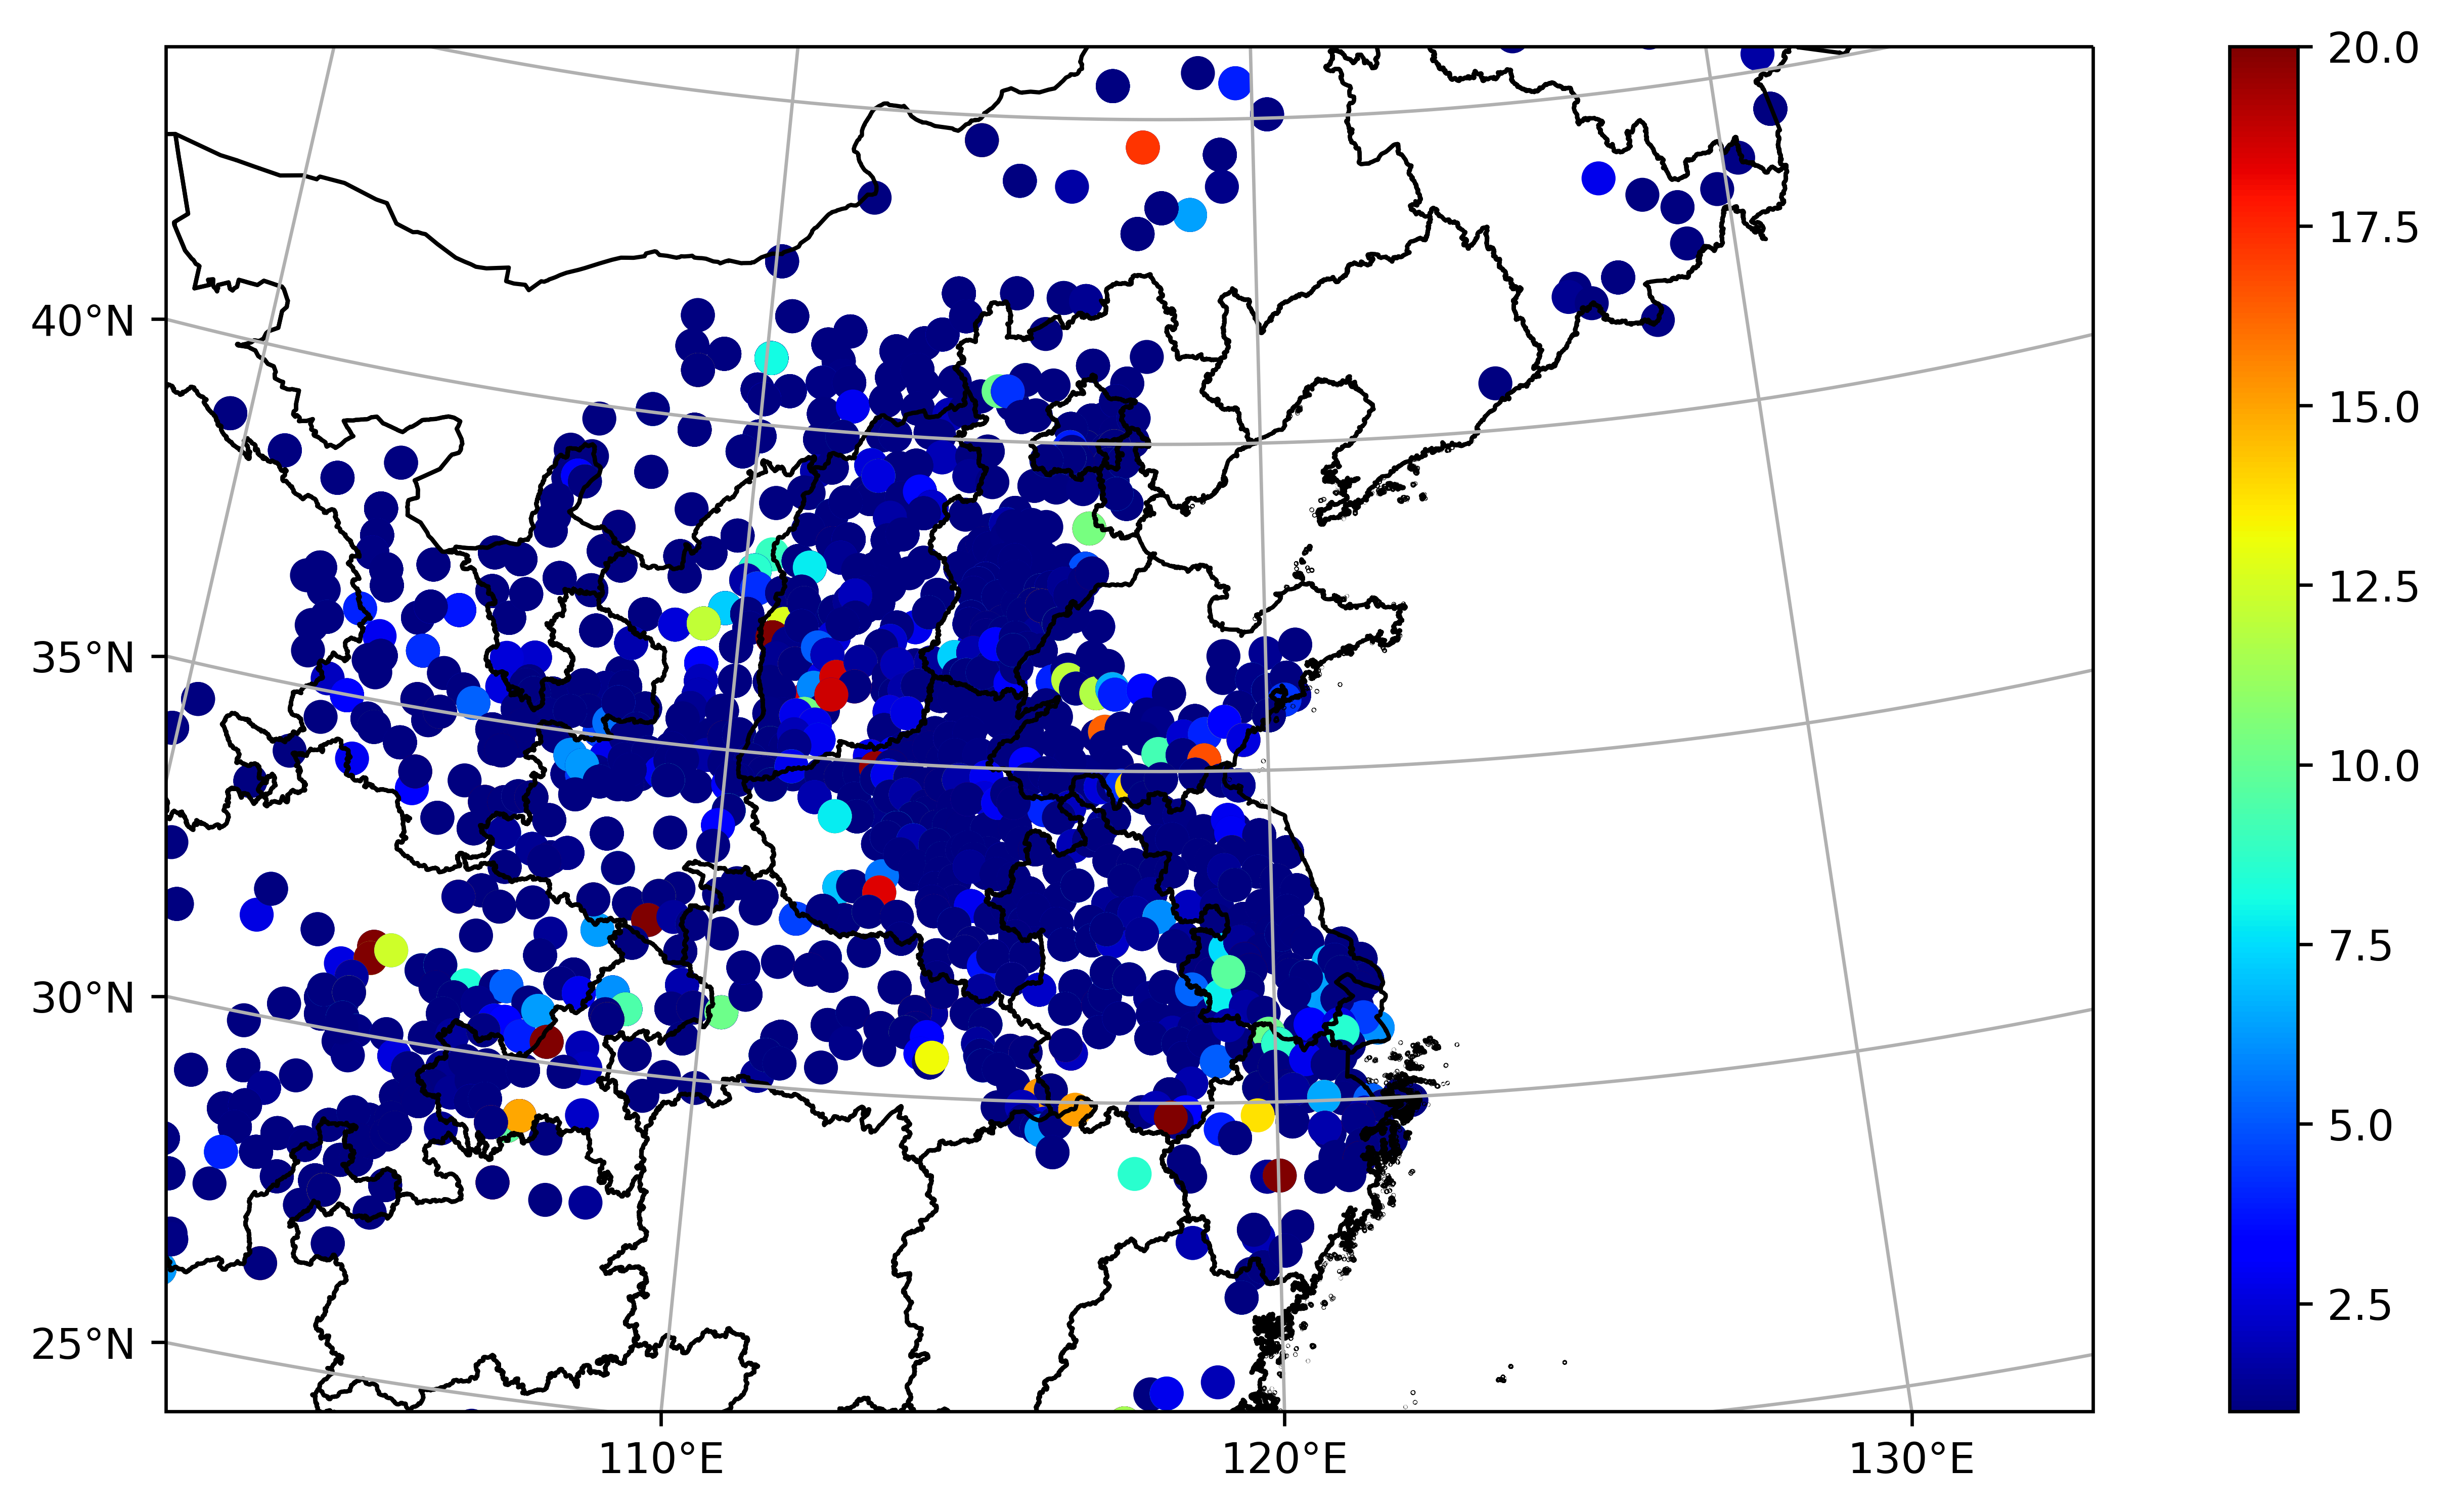

In [50]:
##画图
proj = ccrs.LambertConformal(central_longitude=118, central_latitude=37,
                            standard_parallels=(30, 60))
# proj = ccrs.PlateCarree(central_longitude=110)
#读取中国省界shp文件
cnmap="/mnt/d/work/sunhh/script/map/cn_shp/Province_9south/province_9south.shp"
reader = shpreader.Reader(cnmap)
states_provinces = cfeature.ShapelyFeature(reader.geometries(), crs = ccrs.PlateCarree(), edgecolor = 'face', facecolor = 'None')

fig = plt.figure(figsize=(15,15), frameon=True, dpi=600, facecolor='white')
ax1 = fig.add_axes([0.6,0.44,0.6,0.3],projection=proj)
# ax2 = fig.add_axes([1.14,0.44,0.6,0.3],projection=proj)
# ax3 = fig.add_axes([1.68,0.44,0.6,0.3],projection=proj)
# ax4 = fig.add_axes([1.64,0.44,0.6,0.3],projection=proj)
# axlist = [ax1,ax2,ax3]
axlist=[ax1]
for axs in axlist:
    #画图区域
    axs.set_extent([102, 133, 25, 45], crs=ccrs.PlateCarree())
    # axs.set_extent([70,150,0,70.5], crs=ccrs.PlateCarree())
    # ax.coastlines(resolution='50m')
    axs.add_feature(states_provinces, edgecolor='black')
    # 必须调用draw来获得用于添加刻度的轴边界:
    fig.canvas.draw()
    # 定义网格线位置，并使用cartopy的内置网格线绘制线条:
    xticks = list(range(60, 176, 10))
    yticks = list(range(-5, 66, 5))
    axs.gridlines(xlocs=xticks, ylocs=yticks)
    # 使用自定义的标记符标记网格线的端点:
    axs.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
    axs.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    # xticks and yticks only is list
    lambert_xticks(axs, xticks)  
    lambert_yticks(axs, yticks)
    
# ax1.scatter(draw_data.Lon[draw_data.PRE_1h==0],draw_data.Lat[draw_data.PRE_1h==0],c=' ',zorder=0,s=2,marker='o',edgecolors='gray',transform=ccrs.PlateCarree())
c1=ax1.scatter(draw_data.Lon[draw_data.PRE_1h>=0.1],draw_data.Lat[draw_data.PRE_1h>=0.1],c=draw_data.PRE_1h[draw_data.PRE_1h>=0.1],vmin=1,vmax=20,zorder=1,s=10,cmap='jet',transform=ccrs.PlateCarree())

# colorbar
import matplotlib.ticker as ticker
# cbpostion = fig.add_axes([0.24, 0.2, 0.6, 0.02])
# cb = fig.colorbar(c1,cax=cbpostion,orientation='vertical',format='%.1f')
cb = fig.colorbar(c1,orientation='vertical',format='%.1f')

# cb.set_ticks(np.arange(0,20.1,2))

# fig.savefig('/mnt/d/work/sunhh/figure/obs/ERA_T.png',dpi=600,bbox_inches='tight')

In [ ]:
plt.scatter(draw_data.Lon,draw_data.Lat,c=draw_data.PRE_1h,vmin=0,vmax=1,cmap='jet',s=2)

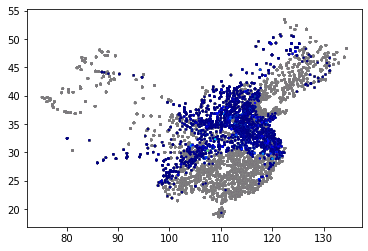

In [47]:
plt.scatter(draw_data.Lon[draw_data.PRE_1h==0],draw_data.Lat[draw_data.PRE_1h==0],c=draw_data.PRE_1h[draw_data.PRE_1h==0],zorder=0,s=2,marker='o',edgecolors='gray')
plt.scatter(draw_data.Lon[draw_data.PRE_1h!=0],draw_data.Lat[draw_data.PRE_1h!=0],c=draw_data.PRE_1h[draw_data.PRE_1h!=0],zorder=1,s=2,cmap='jet')